In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm 

In [3]:
years = 15 

endDate = dt.datetime.now()

startDate = endDate - dt.timedelta(days = 365*years)

In [4]:
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']


In [5]:
#Download adjusted close prices

adj_close_df = pd.DataFrame()

for t in tickers:
    data = yf.download(t, start= startDate, end= endDate)
    adj_close_df[t] =  data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
print(adj_close_df)

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2008-10-08   72.975731  48.154270   89.419998   28.333380   36.723751
2008-10-09   67.879158  46.654305   89.900002   27.572348   34.417698
2008-10-10   66.232704  45.231907   83.220001   27.397390   33.422916
2008-10-13   75.849541  47.113331   81.989998   30.730215   37.711014
2008-10-14   74.726944  47.714634   82.199997   29.400585   37.386940
...                ...        ...         ...         ...         ...
2023-09-28  428.519989  69.617912  173.229996  358.010010  213.029999
2023-09-29  427.480011  69.587997  171.449997  358.269989  212.410004
2023-10-02  427.309998  69.110001  169.649994  361.260010  212.130005
2023-10-03  421.589996  68.550003  169.160004  354.920013  209.050003
2023-10-04  424.660004  69.000000  169.139999  359.750000  210.559998

[3773 rows x 5 columns]


In [7]:
#Calculate daily log returns and drop NA
#Drop NA as first row will be null

log_returns = np.log(adj_close_df/adj_close_df.shift(1))

log_returns = log_returns.dropna()

In [8]:
log_returns

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2008-10-09,-0.072398,-0.031645,0.005354,-0.027227,-0.064853
2008-10-10,-0.024555,-0.030962,-0.077210,-0.006366,-0.029329
2008-10-13,0.135577,0.040753,-0.014890,0.114799,0.120710
2008-10-14,-0.014911,0.012682,0.002558,-0.044232,-0.008631
2008-10-15,-0.103637,-0.006116,0.013413,-0.093823,-0.098197
...,...,...,...,...,...
2023-09-28,0.005781,0.002582,-0.005010,0.008330,0.006594
2023-09-29,-0.002430,-0.000430,-0.010329,0.000726,-0.002915
2023-10-02,-0.000398,-0.006893,-0.010554,0.008311,-0.001319


In [9]:
#Create equally weighted portfolio

port_val = 10000000
weights = np.array([1/len(tickers)] *len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [12]:
#Historical Portfolio Return 

hist_return = (log_returns*weights).sum(axis=1)

print(hist_return)

Date
2008-10-09   -0.038154
2008-10-10   -0.033684
2008-10-13    0.079390
2008-10-14   -0.010507
2008-10-15   -0.057672
                ...   
2023-09-28    0.003655
2023-09-29   -0.003075
2023-10-02   -0.002171
2023-10-03   -0.011367
2023-10-04    0.006879
Length: 3772, dtype: float64


In [13]:
#Find X-Day historical return 

days = 5

range_return = hist_return.rolling(window = days).sum()
range_return = range_return.dropna()
print(range_return)

Date
2008-10-15   -0.060627
2008-10-16   -0.004663
2008-10-17    0.021963
2008-10-20   -0.027026
2008-10-21   -0.042360
                ...   
2023-09-28   -0.008790
2023-09-29   -0.012486
2023-10-02   -0.014733
2023-10-03   -0.015407
2023-10-04   -0.006079
Length: 3768, dtype: float64


In [15]:
#Specify confidence level and calculate VaR

confidence_internal = 0.95

VaR = -np.percentile(range_return, 100 - (confidence_internal * 100 )) * port_val

print(VaR)

261769.78098932395


In [16]:
#For a 5 day period at 95% confidence level we lose  approx $261769

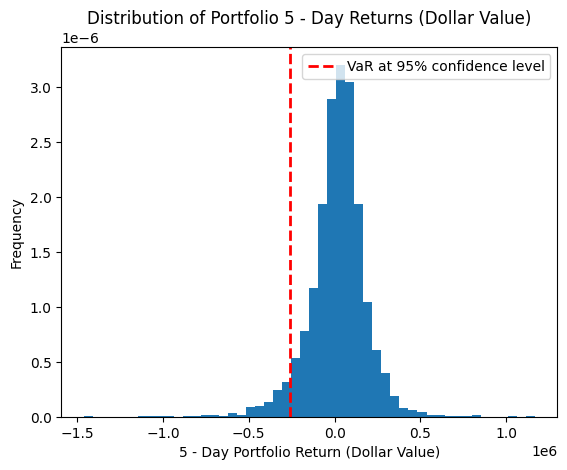

In [20]:
return_window = days
range_return_dollar = range_return * port_val

plt.hist(range_return_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window} - Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window} - Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_internal:.0%} confidence level')
plt.legend()
plt.show()
